In [89]:
import sqlite3 as sq
sq.sqlite_version

'3.8.11'

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt

In [91]:
conn=sq.connect('database.sqlite') #importing sql database
cur=conn.cursor() #defining the python cursor
#database contains column names of id, name, year, gender, count

In [92]:
cur.execute("SELECT * FROM NationalNames LIMIT 5;")
cur.fetchall()

[(1, 'Mary', 1880, 'F', 7065),
 (2, 'Anna', 1880, 'F', 2604),
 (3, 'Emma', 1880, 'F', 2003),
 (4, 'Elizabeth', 1880, 'F', 1939),
 (5, 'Minnie', 1880, 'F', 1746)]

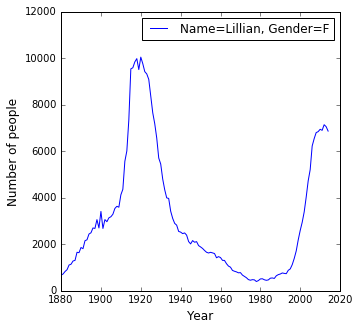

In [99]:
cur.execute("SELECT year, count FROM NationalNames WHERE name='Lillian' AND gender='F';")
data=cur.fetchall()
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
fig=plt.figure(figsize=(5,5))
plt.plot(x_val,y_val, label="Name=Lillian, Gender=F") 
plt.legend(fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of people', fontsize=12)
plt.show()

In [100]:
cur.execute("SELECT name FROM NationalNames WHERE year='2014' AND count<=10;")
cur.fetchall()

[('Aaditri',),
 ('Aairah',),
 ('Aarilyn',),
 ('Aasiya',),
 ('Abelina',),
 ('Abiageal',),
 ('Abiola',),
 ('Adamarie',),
 ('Adayah',),
 ('Addaline',),
 ('Addalynne',),
 ('Addilyne',),
 ('Addylin',),
 ('Adea',),
 ('Adelis',),
 ('Adisen',),
 ('Adreana',),
 ('Adrien',),
 ('Adylan',),
 ('Aella',),
 ('Afomia',),
 ('Ahlaya',),
 ('Ahmaya',),
 ('Ahmira',),
 ('Ahnyla',),
 ('Ahriana',),
 ('Aika',),
 ('Ailana',),
 ('Aimi',),
 ('Ainzlee',),
 ('Aiyanah',),
 ('Aiyonna',),
 ('Akila',),
 ('Akyah',),
 ('Akylah',),
 ('Alaine',),
 ('Alayziah',),
 ('Aleesha',),
 ('Alexzandra',),
 ('Aleyla',),
 ('Aliena',),
 ('Aliviya',),
 ('Alixandra',),
 ('Alizeh',),
 ('Allessandra',),
 ('Alonni',),
 ('Alorah',),
 ('Alyda',),
 ('Alylah',),
 ('Alynn',),
 ('Alyona',),
 ('Alyzza',),
 ('Amadea',),
 ('Ambriella',),
 ('Amea',),
 ('Amenia',),
 ('Ameris',),
 ('Amilee',),
 ('Amitiel',),
 ('Ammara',),
 ('Amoree',),
 ('Amorette',),
 ('Amrutha',),
 ('Amry',),
 ('Anaeli',),
 ('Anahla',),
 ('Anahli',),
 ('Anaijah',),
 ('Anaika',),
 ('An

In [101]:
cur.execute("SELECT DISTINCT name FROM NationalNames WHERE name LIKE 'L%';")
cur.fetchall()

[('La',),
 ('Laaibah',),
 ('Laakea',),
 ('Laangela',),
 ('Laanthony',),
 ('Laasia',),
 ('Laasya',),
 ('Laban',),
 ('Labarbara',),
 ('Labaron',),
 ('Labarron',),
 ('Labella',),
 ('Labelle',),
 ('Laberta',),
 ('Labib',),
 ('Labiba',),
 ('Labon',),
 ('Laborn',),
 ('Labradford',),
 ('Labrandon',),
 ('Labraya',),
 ('Labrea',),
 ('Labree',),
 ('Labreeska',),
 ('Labrenda',),
 ('Labresha',),
 ('Labreshia',),
 ('Labreya',),
 ('Labreyah',),
 ('Labria',),
 ('Labrian',),
 ('Labrina',),
 ('Labrisha',),
 ('Labritney',),
 ('Labrittany',),
 ('Labrittney',),
 ('Labron',),
 ('Labryan',),
 ('Labryant',),
 ('Labyron',),
 ('Lacalvin',),
 ('Lacandice',),
 ('Lacandis',),
 ('Lacara',),
 ('Lacarla',),
 ('Lacarlos',),
 ('Lacasha',),
 ('Lacasta',),
 ('Lacci',),
 ('Lace',),
 ('Lacedric',),
 ('Lacee',),
 ('Lacei',),
 ('Lacelyn',),
 ('Lacen',),
 ('Lacey',),
 ('Lachae',),
 ('Lachaka',),
 ('Lachan',),
 ('Lachana',),
 ('Lachanda',),
 ('Lachandra',),
 ('Lachanta',),
 ('Lachante',),
 ('Lachara',),
 ('Lacharles',),
 ('La

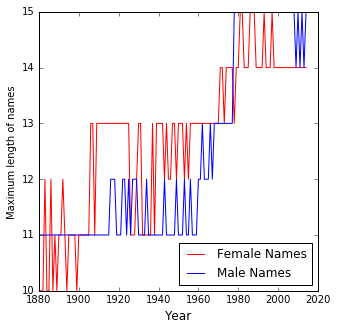

In [107]:
cur.execute("SELECT year, MAX(LENGTH(name)) FROM NationalNames WHERE gender='F' GROUP BY year;") #max length of female name by year
longF=cur.fetchall()
cur.execute("SELECT year, MAX(LENGTH(name)) FROM NationalNames WHERE gender='M' GROUP BY year;") #max length of male name by year
longM=cur.fetchall()
xF = [x[0] for x in longF]
yF = [x[1] for x in longF]
xM = [x[0] for x in longM]
yM = [x[1] for x in longM]
fig=plt.figure(figsize=(5,5))
plt.plot(xF,yF, color="red", label="Female Names") #plot female name lengths in pink
plt.plot(xM,yM, color="blue", label="Male Names") #plot male name lengths in blue
plt.legend(loc='lower right',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Maximum length of names')
plt.show()

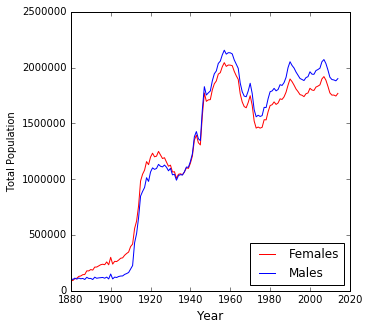

In [109]:
cur.execute("SELECT year, SUM(count) FROM NationalNames WHERE gender='F' GROUP BY year") #total number of females by year
totalF=cur.fetchall()
cur.execute("SELECT year, SUM(count) FROM NationalNames WHERE gender='M' GROUP BY year") #total number of males by year
totalM=cur.fetchall()
xF = [x[0] for x in totalF]
yF = [x[1] for x in totalF]
fig=plt.figure(figsize=(5,5))
xM = [x[0] for x in totalM]
yM = [x[1] for x in totalM]
plt.plot(xF,yF, color="red", label="Females") #plot female name lengths in pink
plt.plot(xM,yM, color="blue", label="Males") #plot male name lengths in blue
plt.legend(loc='lower right',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Population')
plt.show()

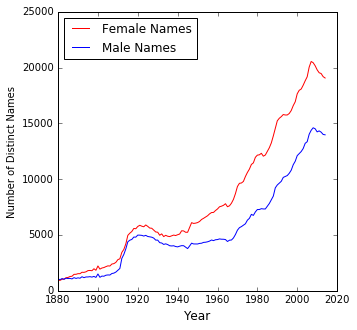

In [111]:
cur.execute("SELECT year, COUNT(DISTINCT name) FROM NationalNames WHERE gender='F' GROUP BY year;") #number of distinct female names grouped by year
countF=cur.fetchall()
cur.execute("SELECT year, COUNT(DISTINCT name) FROM NationalNames WHERE gender='M' GROUP BY year;") #number of distinct female names grouped by year
countM=cur.fetchall()
xF = [x[0] for x in countF]
yF = [x[1] for x in countF]
fig=plt.figure(figsize=(5,5))
xM = [x[0] for x in countM]
yM = [x[1] for x in countM]
plt.plot(xF,yF, color="red", label="Female Names") #plot female in pink
plt.plot(xM,yM, color="blue", label="Male Names") #plot male in blue
plt.legend(loc='upper left',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Distinct Names')
plt.show()

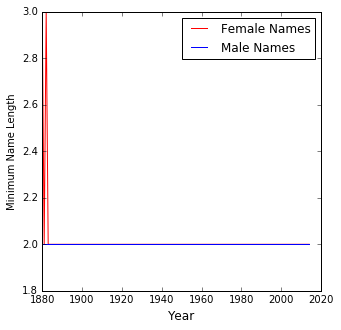

In [112]:
cur.execute("SELECT year, MIN(LENGTH(name)) FROM NationalNames WHERE gender='F' GROUP BY year;") #min length of female name by year
shortF=cur.fetchall()
cur.execute("SELECT year, MIN(LENGTH(name)) FROM NationalNames WHERE gender='M' GROUP BY year;") #min length of male name by year
shortM=cur.fetchall()
xF = [x[0] for x in shortF]
yF = [x[1] for x in shortF]
fig=plt.figure(figsize=(5,5))
xM = [x[0] for x in shortM]
yM = [x[1] for x in shortM]
plt.plot(xF,yF, color="red", label="Female Names") #plot female name lengths in pink
plt.plot(xM,yM, color="blue", label="Male Names") #plot male name lengths in blue
plt.legend(loc='upper right',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Minimum Name Length')
plt.show()

In [113]:
cur.execute("SELECT DISTINCT name, MIN(LENGTH(name)) FROM NationalNames WHERE gender='M' GROUP BY year;")
cur.fetchall()

[('Ed', 2), ('Al', 2), ('Ty', 2)]

In [114]:
cur.execute("SELECT DISTINCT name, MIN(LENGTH(name)) FROM NationalNames WHERE gender='F' GROUP BY year;")
cur.fetchall()

[('Ida', 3), ('Jo', 2), ('Lu', 2), ('Pa', 2), ('Vy', 2), ('Bo', 2), ('An', 2)]

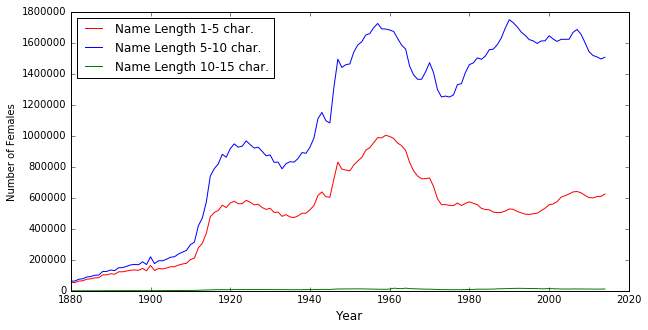

In [118]:
cur.execute("SELECT year, SUM(count) FROM NationalNames WHERE gender='F' AND LENGTH(name) BETWEEN 1 AND 5 GROUP BY year;")
one2five=cur.fetchall()
cur.execute("SELECT year, SUM(count) FROM NationalNames WHERE gender='F' AND LENGTH(name) BETWEEN 5 AND 10 GROUP BY year;")
five2ten=cur.fetchall()
cur.execute("SELECT year, SUM(count) FROM NationalNames WHERE gender='F' AND LENGTH(name) BETWEEN 10 AND 15 GROUP BY year;")
ten2fifteen=cur.fetchall()
xshort = [x[0] for x in one2five]
yshort = [x[1] for x in one2five]
xmid = [x[0] for x in five2ten]
ymid = [x[1] for x in five2ten]
xlong = [x[0] for x in ten2fifteen]
ylong = [x[1] for x in ten2fifteen]
fig=plt.figure(figsize=(10,5))
plt.plot(xshort,yshort, color="red", label="Name Length 1-5 char.") #plot in red, number of females with names of length 1 to 5 characters
plt.plot(xmid,ymid, color="blue", label="Name Length 5-10 char.") #plot in blue, number of females with names of length 5 to 10 characters
plt.plot(xlong, ylong, color="green", label="Name Length 10-15 char.") #plot in green, number of females with names of length 10 to 15 characters
#plt.yscale("log")
plt.legend(loc='upper left',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Females')
plt.show()

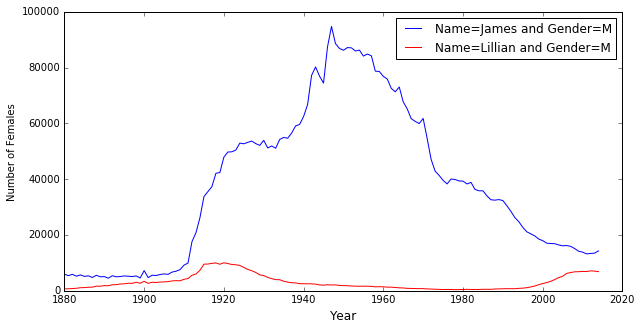

In [119]:
cur.execute("SELECT name, year, count FROM NationalNames WHERE name='Lillian' AND gender='F'"+ 
            " UNION " +
            " SELECT name, year, count FROM NationalNames WHERE name='James' AND gender='M';")
landj=cur.fetchall() #returns the year and count for the names James and Lillian

#print(landj[0])
xj=[]
yj=[]
xl=[]
yl=[]
for i in range(len(landj)): #this will separate out the two names from the SQL returned data
    if landj[i][0]=='James':
            xj.append(landj[i][1]) #James
            yj.append(landj[i][2])
    else:
            xl.append(landj[i][1]) #Lillian
            yl.append(landj[i][2])
fig=plt.figure(figsize=(10,5))
plt.plot(xj,yj, color="blue", label="Name=James and Gender=M")
plt.plot(xl, yl, color="red", label="Name=Lillian and Gender=M")
plt.legend(loc='upper right',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Females')
plt.show()

#for i in range(len(landj)):
#    for j in range(len(landj[i])):
#                print(landj[i][j])

In [88]:
#bryan playing around/us talking about this
bryansnames=['James','Lillian']
for mname in bryansnames:
    print ("Now you put in your sql commands for " + mname)
    x_n=[]
    y_n=[]
    for i in range(len(yoursql_output)):
        
    plt.plot()
plt.show()

Now you put in your sql commands for James
Now you put in your sql commands for Lillian


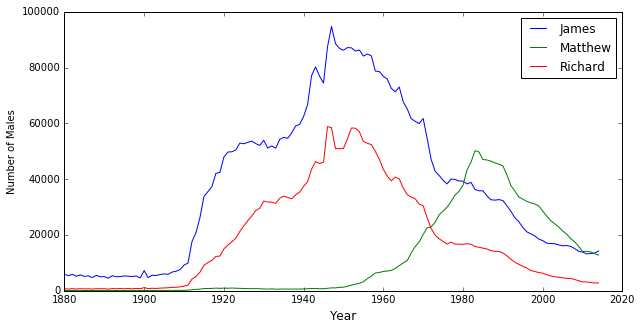

In [136]:
bryansnames=['James', 'Matthew', 'Richard']
fig=plt.figure(figsize=(10,5))
for name in bryansnames:
    cur.execute("SELECT name, year, count FROM NationalNames WHERE name='" + name + "' AND gender='M';")
    output=cur.fetchall()
#    print(name)
    x=[]
    y=[]
    for i in range(len(output)):
        x.append(output[i][1])
        y.append(output[i][2])
    plt.plot(x,y,label=output[0][0])

#fig=plt.figure(figsize=(10,5))
plt.legend(loc='upper right',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Males')
plt.show()
    


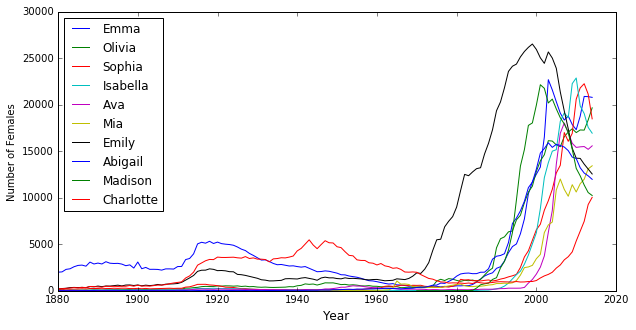

In [152]:
cur.execute("SELECT name FROM NationalNames WHERE year='2014' AND gender='F' LIMIT 10")
topten=cur.fetchall()
toptenlist = [x[0] for x in topten]
fig=plt.figure(figsize=(10,5))
for name in toptenlist:
    cur.execute("SELECT name, year, count FROM NationalNames WHERE name='" + name + "' AND gender='F';")
    output=cur.fetchall()
#    print(name)
    x=[]
    y=[]
    for i in range(len(output)):
        x.append(output[i][1])
        y.append(output[i][2])
    plt.plot(x,y,label=output[0][0])

#fig=plt.figure(figsize=(15,10))
plt.legend(loc='upper left',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Females')
plt.show()

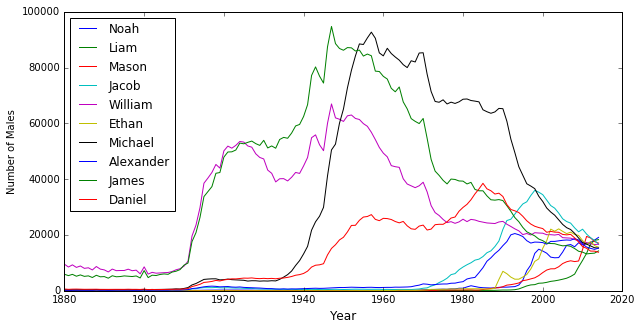

In [153]:
cur.execute("SELECT name FROM NationalNames WHERE year='2014' AND gender='M' LIMIT 10")
topten=cur.fetchall()
toptenlist = [x[0] for x in topten]
fig=plt.figure(figsize=(10,5))
for name in toptenlist:
    cur.execute("SELECT name, year, count FROM NationalNames WHERE name='" + name + "' AND gender='M';")
    output=cur.fetchall()
#    print(name)
    x=[]
    y=[]
    for i in range(len(output)):
        x.append(output[i][1])
        y.append(output[i][2])
    plt.plot(x,y,label=output[0][0])

#fig=plt.figure(figsize=(15,10))
plt.legend(loc='upper left',fontsize=12)
ax=fig.add_subplot(111)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Males')
plt.show()